# Sales Analysis

### Import Requried Liberaries

In [2]:
import pandas as pd
import os

#### Merging 12 months of sales data into a single file

In [16]:
## My Approach Using os liberary


path = os.path.join(os.getcwd(),'Sales_Data')

lst = []
for filename in os.listdir(path):
    
    # Reading file using pandas read csv methosd
    
    df_file = pd.read_csv(path + f"\\{filename}")
    
    # Combining all months data in single list
    
    lst.append(df_file)
    
# Combining List of dataframe into single dataframe


data = pd.concat(lst)
    
    

In [25]:
# Galli Approach

all_months_data = pd.DataFrame()
for file in os.listdir('Sales_Data'):
    df = pd.read_csv('Sales_Data'+ f"\\{file}")
    all_months_data = pd.concat([all_months_data,df])

all_months_data.head()
all_months_data.to_csv('all_data.csv',index=False)

In [111]:
# Read the updated dataframe
all_data = pd.read_csv('all_data.csv')

In [112]:
all_data.shape

(186305, 6)

In [113]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Clean up the data

In [114]:
# My Approach
# Removed Null Values
all_data=all_data[~all_data['Order ID'].isnull()]
# all_data.to_csv('all_data.csv',index=False)

# Removing column name row from dataframe

all_data=all_data[all_data['Order Date'] !='Order Date']


In [115]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186301,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186302,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186303,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Make order in correct format (%Y-%m-%d)

In [116]:
test = all_data.head()

In [121]:
#test['Order Date'].apply(lambda x :dateutil.parser.parse(x).strftime("%Y-%m-%d %H:%M") )

In [120]:
import dateutil.parser
all_data['Order Date']=all_data['Order Date'].apply(lambda x :dateutil.parser.parse(x).strftime("%Y-%m-%d %H:%M") )

all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [122]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

### Augment data with additional column

### Task -2 : Add Month Name

In [15]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered            object
Price Each                  object
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [123]:
# Galli Approach
all_data['Month Name'] = all_data['Order Date'].dt.month



In [124]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
2,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Task 3 : Add a column Sales

#### Convert column to correct format

In [125]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) # make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # make int

##### Total Sales column (Qnantity ordered * price each)

In [126]:
 #Total Sales

all_data['Total Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [127]:
all_data.groupby(['Month Name'])['Total Sales'].sum()

Month Name
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

#### Task 4 :  Augment data with additional column (city name)

In [128]:
# My Approach

def city(x):
    city_name = x.split(',')[1]
    city_name = city_name.strip()
    
    return city_name

def state(x):
    state_name = x.split(',')[2].split()[0]
    state_name = state_name.strip()
    return state_name
def city_state(x):
    #city_state = x.split(',')[1:]
    #city_state = city_state.split(" ")[0]
    city_name = city(x)
    state_name = state(x)
    
    return f"{city_name}({state_name})"
    
    
all_data['City_Name'] =all_data['Purchase Address'].apply(city)  
all_data['State_Name'] =all_data['Purchase Address'].apply(city)  
all_data['City_State_Name'] =all_data['Purchase Address'].apply(city_state) 

all_data.drop(['City_Name','State_Name'],axis =1,inplace=True)

#### Task 4 :  Augment data with additional column (Hours)

In [ ]:
all_data['Hour']=all_data['Order Date'].dt.hour

### Question 1 : What was the best month for Sales ? how much was earned that month?

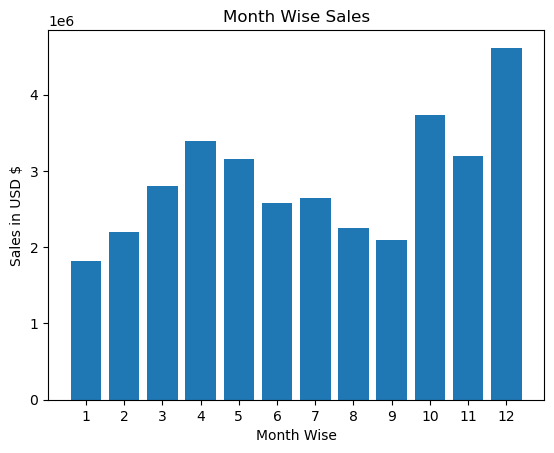

In [26]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months,all_data.groupby(all_data['Order Date'].dt.month)['Total Sales'].sum())
plt.xticks(months)
plt.xlabel('Month Wise')
plt.ylabel('Sales in USD $')
plt.title('Month Wise Sales')
plt.show()

### Question 2 : What city had the highest number of sales

In [98]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Name,Total Sales,City_State_Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)


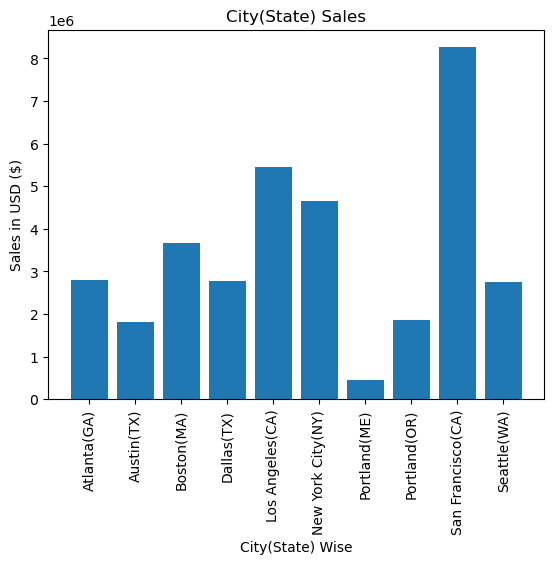

In [102]:
city_names= all_data.groupby(['City_State_Name'])['Total Sales'].sum().index.tolist()
plt.bar(city_names,all_data.groupby(['City_State_Name'])['Total Sales'].sum())
plt.xticks(city_names,rotation = 'vertical')
plt.xlabel("City(State) Wise")
plt.ylabel('Sales in USD ($)')
plt.title("City(State) Sales")
plt.show()

In [73]:
all_data.head(50)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Name,Total Sales,City_Name,State_Name
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176562,USB-C Charging Cable,1,11.95,2019-04-29,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,CA
6,176563,Bose SoundSport Headphones,1,99.99,2019-04-02,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,WA
7,176564,USB-C Charging Cable,1,11.95,2019-04-12,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,GA
8,176565,Macbook Pro Laptop,1,1700.00,2019-04-24,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,CA
9,176566,Wired Headphones,1,11.99,2019-04-08,"83 7th St, Boston, MA 02215",4,11.99,Boston,MA


In [108]:
#[City_State_Name for City_State_Name,df in all_data.groupby(['City_State_Name'])]

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [136]:
# My Approach
# hour calculated

In [142]:
all_data.groupby(['Hour'])['Total Sales'].sum()

Hour
0      713721.27
1      460866.88
2      234851.44
3      145757.89
4      162661.01
5      230679.82
6      448113.00
7      744854.12
8     1192348.97
9     1639030.58
10    1944286.77
11    2300610.24
12    2316821.34
13    2155389.80
14    2083672.73
15    1941549.60
16    1904601.31
17    2129361.61
18    2219348.30
19    2412938.54
20    2281716.24
21    2042000.86
22    1607549.21
23    1179304.44
Name: Total Sales, dtype: float64

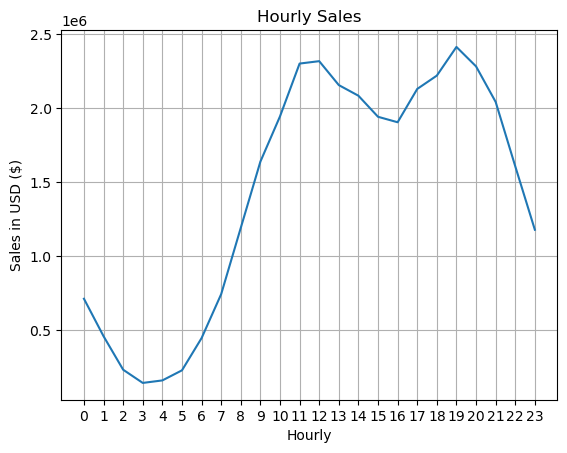

In [149]:
hourly= all_data.groupby(['Hour'])['Total Sales'].sum().index.tolist()
plt.plot(hourly,all_data.groupby(['Hour'])['Total Sales'].sum())
plt.xticks(hourly)
plt.xlabel("Hourly")
plt.ylabel('Sales in USD ($)')
plt.title("Hourly Sales")
plt.grid()
plt.gray()
plt.show()

### Question 4: What Products are most often sold together

In [173]:
# My Approach

In [156]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month Name,Total Sales,City_State_Name,Hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9


In [161]:
test=all_data.groupby(['Order ID'],as_index=False)['Product'].count()
order_sold_together=test[test['Product']>1]['Order ID'].unique()

In [166]:
Product_Sold_together=all_data[all_data['Order ID'].isin(order_sold_together)].reset_index(drop=True)

In [186]:
# Galli Approach
product_sold_together= all_data[all_data['Order ID'].duplicated(keep=False)].reset_index(drop=True)

In [189]:
product_sold_together['grouped']=product_sold_together.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

In [195]:
product_sold_together=product_sold_together[['Order ID','grouped']].drop_duplicates().reset_index(drop=True)

In [197]:
df=product_sold_together.copy()

In [199]:
df['grouped'].value_counts()

iPhone,Lightning Charging Cable                                            882
Google Phone,USB-C Charging Cable                                          856
iPhone,Wired Headphones                                                    361
Vareebadd Phone,USB-C Charging Cable                                       312
Google Phone,Wired Headphones                                              303
                                                                          ... 
Google Phone,USB-C Charging Cable,Wired Headphones,USB-C Charging Cable      1
34in Ultrawide Monitor,LG Washing Machine                                    1
20in Monitor,iPhone                                                          1
Google Phone,USB-C Charging Cable,Wired Headphones,27in FHD Monitor          1
LG Washing Machine,AA Batteries (4-pack)                                     1
Name: grouped, Length: 366, dtype: int64

In [207]:
df[df['grouped']=='iPhone,Lightning Charging Cable']

,Order ID,grouped
9,176781,"iPhone,Lightning Charging Cable"
20,177115,"iPhone,Lightning Charging Cable"
23,177178,"iPhone,Lightning Charging Cable"
29,177213,"iPhone,Lightning Charging Cable"
37,177441,"iPhone,Lightning Charging Cable"
...,...,...
7101,258557,"iPhone,Lightning Charging Cable"
7108,258731,"iPhone,Lightning Charging Cable"
7109,258755,"iPhone,Lightning Charging Cable"
7112,258807,"iPhone,Lightning Charging Cable"


In [200]:
from itertools import combinations
from collections import Counter

In [203]:
count = Counter()

for row in df['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

In [205]:
count.most_common(20)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92),
 (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81),
 (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80),
 (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77),
 (('Apple Airpods Headphones', 'Wired Headphones'), 69),
 (('Lightning Charging Cable', 'USB-C Charging Cable'), 58),
 (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55),
 (('Lightning Charging Cable', 'Lightning Charging Cable'), 54),
 (('Bose SoundSport Headphones', 'Wired Headphones'), 53),
 (('AA B

### Question 5 : What product sold the most ? Why do you think it sold the most?

In [216]:
most_products=all_data.groupby(['Product'],as_index=False)['Quantity Ordered'].sum()

In [223]:
most_products

,Product,Quantity Ordered
0,20in Monitor,4129
1,27in 4K Gaming Monitor,6244
2,27in FHD Monitor,7550
3,34in Ultrawide Monitor,6199
4,AA Batteries (4-pack),27635
5,AAA Batteries (4-pack),31017
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,Flatscreen TV,4819
9,Google Phone,5532


In [231]:
all_data.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

C:\Users\kushal kumar\AppData\Local\Temp\ipykernel_54696\2143751296.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(most_products['Product'].unique(),rotation = 'vertical')


Text(0.5, 1.0, 'Most Sold Products')

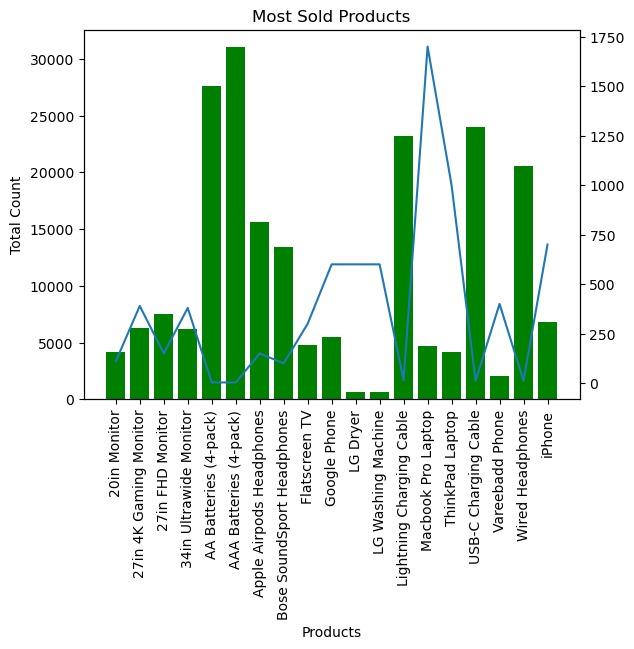

In [234]:
prices=all_data.groupby('Product')['Price Each'].mean()

fig, ax1 =plt.subplots()

ax2 = ax1.twinx()

ax1.bar(most_products['Product'].unique(),most_products['Quantity Ordered'],color = 'g')
ax2.plot(most_products['Product'].unique(),prices)
ax1.set_xticklabels(most_products['Product'].unique(),rotation = 'vertical')
ax1.set_xlabel('Products')
ax1.set_ylabel('Total Count')
ax1.set_title('Most Sold Products')

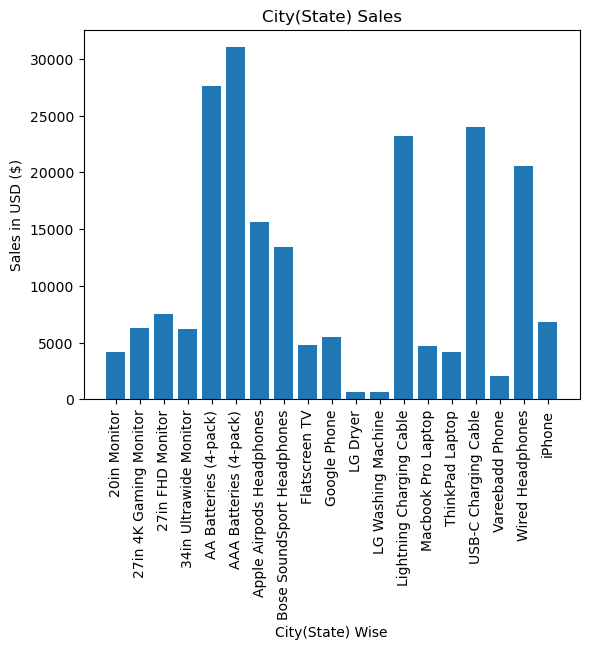

In [225]:
plt.bar(most_products['Product'].unique(),most_products['Quantity Ordered'])
plt.xticks(most_products['Product'].unique(),rotation = 'vertical')
plt.xlabel("City(State) Wise")
plt.ylabel('Sales in USD ($)')
plt.title("City(State) Sales")
plt.show()